In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
#!pip install -U scikit-learn

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [5]:
#Module 1: Importing Data Sets
#Download the dataset by running the cell below.

In [8]:
def download(url, filename):
    # Send a GET request to the provided URL
    response = requests.get(url)
    
    # If the request is successful (HTTP status code 200), save the content to a file
    if response.status_code == 200:
        with open(filename, "wb") as f:
            # Writing the response content to the file as bytes
            f.write(response.content)

filepath= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
download(filepath, "housing.csv")
file_name="housing.csv"

In [13]:
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
#Question 1
#Display the data types of each column using the function dtypes. Take a screenshot of 
#your code and output. You will need to submit the screenshot for the final project.

df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [16]:
#We use the method describe to obtain a statistical summary of the dataframe.

df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [29]:
#Module 2: Data Wrangling

#Question 2
#Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to 
#obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot of 
#your code and output. You will need to submit the screenshot for the final project.

# Drop the columns "id" and "Unnamed: 0" from axis 1
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

# Obtain a statistical summary of the data
summary = df.describe()

# Display the summary
print(summary)


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [31]:
#We can see we have missing values for the columns  bedrooms and  bathrooms

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [33]:
#We can replace the missing values of the column 'bedrooms' with the mean of the column 
#'bedrooms'  using the method replace(). Don't forget to set the inplace parameter to True

mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean1=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [34]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [35]:
#Module 3: Exploratory Data Analysis

#Question 3
#Use the method value_counts to count the number of houses with unique floor values, 
#use the method .to_frame() to convert it to a data frame. Take a screenshot of your 
#code and output. You will need to submit the screenshot for the final project.

floor_counts = df['floors'].value_counts()

# Convert the result to a DataFrame
floor_counts_df = floor_counts.to_frame()

# Display the DataFrame
print(floor_counts_df)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


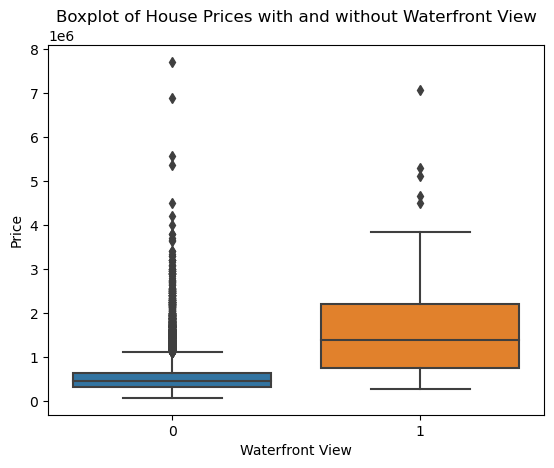

In [36]:
#Question 4
#Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without
#a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit 
#the screenshot for the final project.

# Create the boxplot
sns.boxplot(x='waterfront', y='price', data=df)

# Set labels and title
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.title('Boxplot of House Prices with and without Waterfront View')

# Display the plot
plt.show()


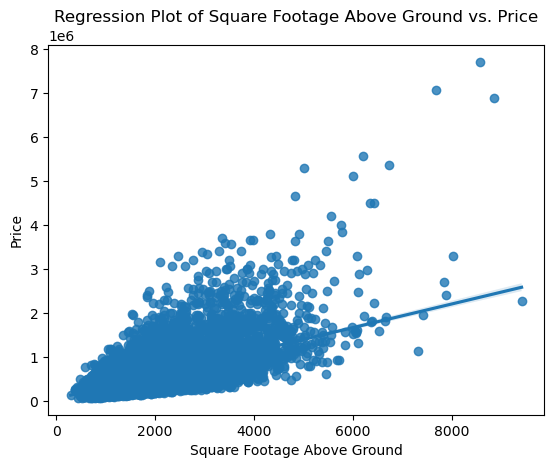

In [37]:
#Question 5
#Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or 
#positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit 
#the screenshot for the final project.

# Create the regression plot
sns.regplot(x='sqft_above', y='price', data=df)

# Set labels and title
plt.xlabel('Square Footage Above Ground')
plt.ylabel('Price')
plt.title('Regression Plot of Square Footage Above Ground vs. Price')

# Display the plot
plt.show()


In [39]:
#We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

df.corr()["price"].sort_values()

ValueError: could not convert string to float: '20141013T000000'

In [40]:
#Module 4: Model Development
#We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [43]:
#Question 6
#Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. 
#Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define the feature (independent variable) and the target (dependent variable)
X = df[['sqft_living']]
y = df['price']

# Split the data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the price using the test set
y_pred = model.predict(X_test)

# Calculate the R² value
r2 = r2_score(y_test, y_pred)

# Print the R² value
print(f'R² value: {r2:.4f}')


R² value: 0.4792


In [44]:
#Question 7
#Fit a linear regression model to predict the 'price' using the list of features:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

#Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for 
#the final project.

In [45]:
# Define the features and the target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]  # Independent variables
y = df['price']   # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the price using the test set
y_pred = model.predict(X_test)

# Calculate the R² value
r2 = r2_score(y_test, y_pred)

# Print the R² value
print(f'R² value: {r2:.4f}')


R² value: 0.6514


In [46]:
#This will help with Question 8
#Create a list of tuples, the first element in the tuple contains the name of the estimator:

#'scale' , 'polynomial', 'model'

#The second element in the tuple contains the model constructor
#StandardScaler()
#PolynomialFeatures(include_bias=False)
#LinearRegression()

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),
       ('model',LinearRegression())]

In [47]:
#Question 8
#Use the list to create a pipeline object to predict the 'price', fit the object using the features in 
#the list features, and calculate the R^2. Take a screenshot of your code and the value of the R^2. 
#You will need to submit it for the final project.

# Define the features and the target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]  # Independent variables
y = df['price']   # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a pipeline with a standard scaler and a linear regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Normalize the data
    ('model', LinearRegression())  # Step 2: Fit a linear regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the price using the test set
y_pred = pipeline.predict(X_test)

# Calculate the R² value
r2 = r2_score(y_test, y_pred)

# Print the R² value
print(f'R² value: {r2:.4f}')


R² value: 0.6515


In [51]:
#Module 5: Model Evaluation and Refinement
#Import the necessary modules:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
print("done")



done


In [49]:
#We will split the data into training and testing sets:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [52]:
#Question 9
#Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, 
#and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will
#need to submit it for the final project.

# Define the features and the target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]  # Independent variables
y = df['price']   # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Ridge regression model with alpha = 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict the price using the test set
y_pred = ridge_model.predict(X_test)

# Calculate the R² value
r2 = r2_score(y_test, y_pred)

# Print the R² value
print(f'R² value: {r2:.4f}')


R² value: 0.6514


In [53]:
#Question 10
#Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge 
#regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 
#utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for 
#the final project.

# Define the features and the target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]  # Independent variables
y = df['price']   # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform a second-order polynomial transformation on the features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Ridge regression model with alpha = 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model on the transformed training data
ridge_model.fit(X_train_poly, y_train)

# Predict the price using the transformed test data
y_pred = ridge_model.predict(X_test_poly)

# Calculate the R² value
r2 = r2_score(y_test, y_pred)

# Print the R² value
print(f'R² value: {r2:.4f}')


R² value: 0.7160
